# Lecture 19: Function Interpolation

## Lagrange interpolation
Classical polynomial interpolation uses Lagrange basis polynomials.
Given a set of $N$ interpolation points $x_i$ we construct the basis functions

$$
\ell_j(x) = \prod_{k=1, k\neq j}^N \frac{x - x_k}{x_j-x_k}
$$

which satisfy

$$
\ell_j(x_k) = \delta_{jk}.
$$

Then the interpolation polynomial through the points $f_j = f(x_j)$ becomes

$$
P(x) = \sum_{j=1}^N f_j\, \ell_j(x)
$$

which interpolates the function values:
$$
P(x_k) = \sum_{j=1}^N f_j\, \underbrace{\ell_j(x_k)}_{=\delta_{jk}} = f_k.
$$

In [8]:
using Interact

using PyPlot
PyPlot.svg(true);

In [9]:
function lagrange_basis(xs)
    """ Return Lagrange basis functions for the vector of
    interpolation points xs
    """
    N = length(xs)
    ℓs = []
    
    for j=1:N
        function ℓ(x)
            xs_no_j = xs[vcat(1:j-1, j+1:N)]
            return prod(x .- xs_no_j)/prod(xs[j] .- xs_no_j)
        end
        
        push!(ℓs, ℓ)
    end
    
    return ℓs
end

lagrange_basis (generic function with 1 method)

In [10]:
xk = LinRange(0, 1, 11)
ℓs = lagrange_basis(xk);

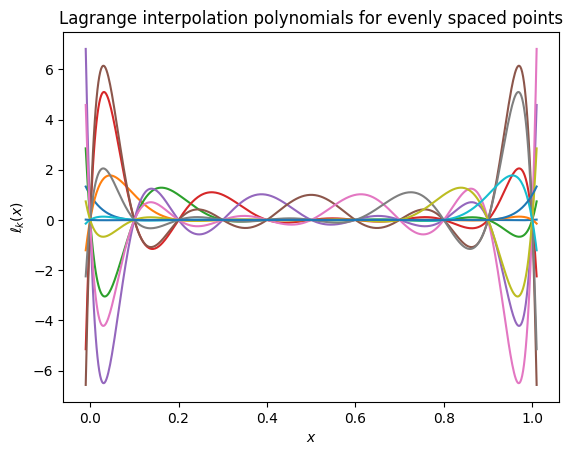

PyObject Text(27.400000000000013, 0.5, '$ℓ_k(x)$')

In [11]:
figure()
xs = LinRange(-0.01, 1.01, 500)

for ℓ in ℓs
    plot(xs, ℓ.(xs))
end

title("Lagrange interpolation polynomials for evenly spaced points")
xlabel(L"x")
ylabel(L"ℓ_k(x)")

In [12]:
# Let's interpolate a simple function
f = sin.(xk*2π)

11-element Array{Float64,1}:
  0.0                   
  0.5877852522924731    
  0.9510565162951535    
  0.9510565162951536    
  0.5877852522924732    
  1.2246467991473532e-16
 -0.587785252292473     
 -0.9510565162951535    
 -0.9510565162951536    
 -0.5877852522924734    
 -2.4492935982947064e-16

In [13]:
function lagrange_interp(x, f, ℓs)
    """ Interpolate the function values f using the basis
    functions ℓs at the point x.
    """
    S = 0.0
    for (fx, ℓ) in zip(f, ℓs)
        S += fx*ℓ(x)
    end
    
    return S
end

lagrange_interp (generic function with 1 method)

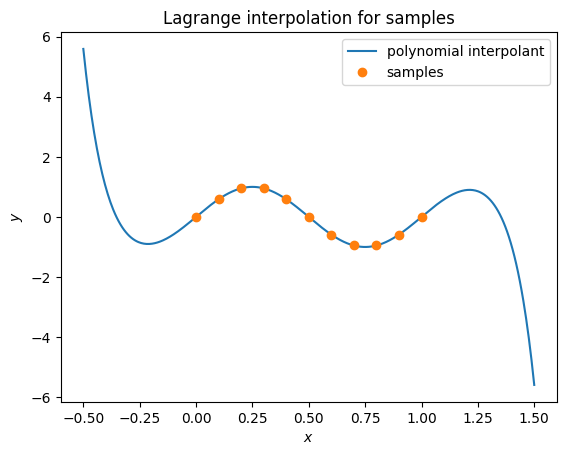

PyObject <matplotlib.legend.Legend object at 0x7f48c3ea0668>

In [14]:
figure()
xs = LinRange(-0.5, 1.5, 500)

li(x) = lagrange_interp(x, f, ℓs)
plot(xs, li.(xs), label="polynomial interpolant")
plot(xk, f, "o", label="samples")

title("Lagrange interpolation for samples")
xlabel(L"x")
ylabel(L"y")
legend()

## Classical interpolation does not converge for $N\rightarrow\infty$

In [15]:
# Runge's function
fun(x) = 1/(1 + 25x^2)

fun (generic function with 1 method)

In [16]:
fig, ax = subplots()

xs = LinRange(-1, 1, 500)
fxs = fun.(xs)

@manipulate for N=slider(2:30, value=2, label="N")
    withfig(fig, clear=false) do
        ax.cla()
        
        ax.plot(xs, fxs, label="Runge's function")

        xks_N = LinRange(-1, 1, N)
        ℓN = lagrange_basis(xks_N)

        f_xks_N = fun.(xks_N)

        li(x) = lagrange_interp(x, f_xks_N, ℓN)

        ax.plot(xks_N, f_xks_N, "o")
        ax.plot(xs, li.(xs), label="N=$(N) interpolant")
        
        ax.set_ylim(0, 1.3)


        ax.legend()
        ax.set_xlabel(L"x")
        ax.set_ylabel(L"f(x)")
    end
end

Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{DOM}(DOM(:html, :div), Any[Scope("knockout-component-fe3e8592-265d-47b3-a800-6ad373f4c737", Node{DOM}(DOM(:html, :div), Any[Node{DOM}(DOM(:html, :div), Any[Node{DOM}(DOM(:html, :label), Any["N"], Dict{Symbol,Any}(:className=>"interact ",:style=>Dict{Any,Any}(:padding=>"5px 10px 0px 10px")), 1)], Dict{Symbol,Any}(:className=>"interact-flex-row-left"), 2), Node{DOM}(DOM(:html, :div), Any[Node{DOM}(DOM(:html, :input), Any[], Dict{Symbol,Any}(:max=>30,:min=>2,:attributes=>Dict{Any,Any}(:type=>"range",Symbol("data-bind")=>"numericValue: index, valueUpdate: 'input', event: {change: function (){this.changes(this.changes()+1)}}","orient"=>"horizontal"),:step=>1,:className=>"slider slider is-fullwidth",:style=>Dict{Any,Any}()), 0)], Dict{Symbol,Any}(:className=>"interact-flex-row-center"), 1), Node{DOM}(DOM(:html, :div), Any[Node{DOM}(DOM(:html, :p), Any[], Dict{Symbol,Any}(:attributes=>Dict("data-bind"=>"text: formatted_val")), 0)], Dict{Symbol,Any}(:className=>"interact-flex-row-right"), 1)], Dict{Symbol,Any}(:className=>"interact-flex-row interact-widget"), 7), Dict{String,Tuple{Observables.AbstractObservable,Union{Nothing, Bool}}}("changes"=>(Observable{Int64} with 1 listeners. Value:
0, nothing),"index"=>(Observable{Int64} with 2 listeners. Value:
2, nothing)), Set(String[]), nothing, Asset[Asset("js", "knockout", "/home/henrik/.julia/packages/Knockout/JE2Yq/src/../assets/knockout.js"), Asset("js", "knockout_punches", "/home/henrik/.julia/packages/Knockout/JE2Yq/src/../assets/knockout_punches.js"), Asset("js", nothing, "/home/henrik/.julia/packages/InteractBase/R8JgH/src/../assets/all.js"), Asset("css", nothing, "/home/henrik/.julia/packages/InteractBase/R8JgH/src/../assets/style.css"), Asset("css", nothing, "/home/henrik/.julia/packages/Interact/0klKX/src/../assets/bulma_confined.min.css")], Dict{Any,Any}("changes"=>Any[JSString("(function (val){return (val!=this.model[\"changes\"]()) ? (this.valueFromJulia[\"changes\"]=true, this.model[\"changes\"](val)) : undefined})")],"index"=>Any[JSString("(function (val){return (val!=this.model[\"index\"]()) ? (this.valueFromJulia[\"index\"]=true, this.model[\"index\"](val)) : undefined})")]), ConnectionPool(Channel{Any}(sz_max:9223372036854775807,sz_curr:0), Set(AbstractConnection[]), Channel{AbstractConnection}(sz_max:32,sz_curr:0)), WebIO.JSString[JSString("function () {\n    var handler = (function (ko, koPunches) {\n    ko.punches.enableAll();\n    ko.bindingHandlers.numericValue = {\n        init : function(element, valueAccessor, allBindings, data, context) {\n            var stringified = ko.observable(ko.unwrap(valueAccessor()));\n            stringified.subscribe(function(value) {\n                var val = parseFloat(value);\n                if (!isNaN(val)) {\n                    valueAccessor()(val);\n                }\n            })\n            valueAccessor().subscribe(function(value) {\n                var str = JSON.stringify(value);\n                if ((str == \"0\") && ([\"-0\", \"-0.\"].indexOf(stringified()) >= 0))\n                     return;\n                 if ([\"null\", \"\"].indexOf(str) >= 0)\n                     return;\n                stringified(str);\n            })\n            ko.applyBindingsToNode(element, { value: stringified, valueUpdate: allBindings.get('valueUpdate')}, context);\n        }\n    };\n    var json_data = {\"formatted_vals\":[\"2\",\"3\",\"4\",\"5\",\"6\",\"7\",\"8\",\"9\",\"10\",\"11\",\"12\",\"13\",\"14\",\"15\",\"16\",\"17\",\"18\",\"19\",\"20\",\"21\",\"22\",\"23\",\"24\",\"25\",\"26\",\"27\",\"28\",\"29\",\"30\"],\"changes\":WebIO.getval({\"name\":\"changes\",\"scope\":\"knockout-component-fe3e8592-265d-47b3-a800-6ad373f4c737\",\"id\":\"ob_02\",\"type\":\"observable\"}),\"index\":WebIO.getval({\"name\":\"index\",\"scope\":\"knockout-component-fe3e8592-265d-47b3-a800-6ad373f4c737\",\"id\":\"ob_01\",\"type\":\"observable\"})};\n    var self = this;\n    function AppViewModel() {\n

## Chebyshev polynomial interpolation

The Chebyshev polynomials are defined by

$$
T_n(x) = \cos(n \arccos(x)) = \sum_{k=0}^{\lfloor{n/2}\rfloor} {{n}\choose{2k}} (x^2 -1)^k x^{n-2k},
$$

and can be used to interpolate arbitrary functions on the interval $[-1,1]$.

In [17]:
function chebyshev_basis(n)
    """ Return the n+1 first Chebyshev polynomials
    """
    chebs = Function[x -> 1.0]
    for i=1:n
        function cheb(x)
            f = 0.0
            for k=0:Int64(floor(i/2))
                f += binomial(i, 2k) * (x^2 - 1)^k * x^(i-2k)
            end
            
            return f
        end
        
        push!(chebs, cheb)
    end
    
    return chebs
end

chebyshev_basis (generic function with 1 method)

In [18]:
chebs = chebyshev_basis(5);

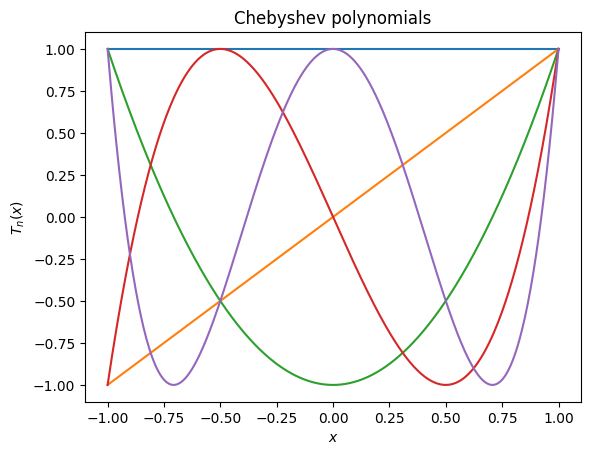

PyObject Text(27.39999999999999, 0.5, '$T_n(x)$')

In [25]:
figure()
xs = LinRange(-1, 1., 500)

for Tn in chebs[1:5]
    plot(xs, Tn.(xs))
end

title("Chebyshev polynomials")
xlabel(L"x")
ylabel(L"T_n(x)")

## Chebyshev transform

Using the inner product 
$$
\langle f, g\rangle = \int_{-1}^1 \frac{f(x) g(x)}{\sqrt{1-x^2}} dx
$$

we find the orthogonality relations
$$
\langle T_n, T_m \rangle = \frac{\pi}{2} \delta_{nm}.
$$

Assuming that a Chebyshev expansion exists for a function $f(x)$:

$$
f(x) = \sum_{n=0}^\infty C_n T_n(x),
$$

we find for the coefficients

$$
C_n = \frac{2}{\pi}  \int_{-1}^1 \frac{f(x) T_n(x)}{\sqrt{1-x^2}} dx.
$$

Restricting to the first $N+1$ terms we find the Chebyshev interpolant

$$
f^{Cheb}(x) = \sum_{n=0}^{N} C_n T_n(x),
$$

which is the unique interpolation polynomial of degree $N+1$ that agrees with $f(x)$
at the Chebyshev points $x_n = \cos (n\pi/N)$.

In [26]:
# Lagrange basis polynomials for the Chebyshev points

xk_cheb = cos.((0:10)*π/10)
ℓs_cheb = lagrange_basis(xk_cheb);

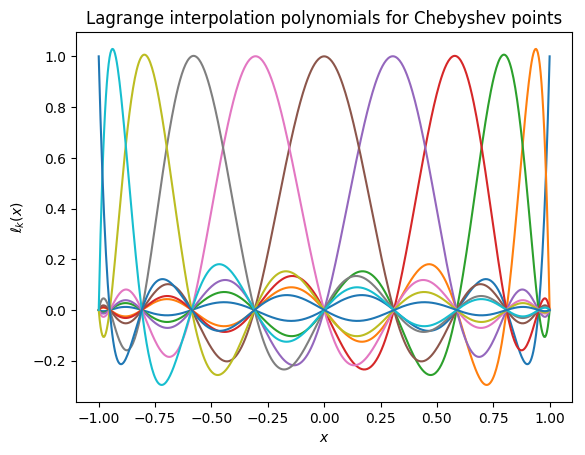

PyObject Text(27.39999999999999, 0.5, '$ℓ_k(x)$')

In [27]:
figure()
xs = LinRange(-1., 1., 500)

for ℓ in ℓs_cheb
    plot(xs, ℓ.(xs))
end

title("Lagrange interpolation polynomials for Chebyshev points")
xlabel(L"x")
ylabel(L"ℓ_k(x)")

In [28]:
fig, ax = subplots()

xs = LinRange(-1, 1, 500)
fxs = fun.(xs)

@manipulate for N=slider(1:30, value=1, label="N")
    withfig(fig, clear=false) do
        ax.cla()
        
        ax.plot(xs, fxs, label="Runge's function")

        xks_N = cos.((0:N)*π/N) # Chebyshev points
        ℓN = lagrange_basis(xks_N)

        f_xks_N = fun.(xks_N)

        li(x) = lagrange_interp(x, f_xks_N, ℓN)

        ax.plot(xks_N, f_xks_N, "o")
        ax.plot(xs, li.(xs), label="N=$(N) Chebyshev interpolant")
        
        ax.set_ylim(0, 1.3)


        ax.legend()
        ax.set_xlabel(L"x")
        ax.set_ylabel(L"f(x)")
    end
end

Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{DOM}(DOM(:html, :div), Any[Scope("knockout-component-c1f559ea-8dc8-4136-98c4-209f8744ac8e", Node{DOM}(DOM(:html, :div), Any[Node{DOM}(DOM(:html, :div), Any[Node{DOM}(DOM(:html, :label), Any["N"], Dict{Symbol,Any}(:className=>"interact ",:style=>Dict{Any,Any}(:padding=>"5px 10px 0px 10px")), 1)], Dict{Symbol,Any}(:className=>"interact-flex-row-left"), 2), Node{DOM}(DOM(:html, :div), Any[Node{DOM}(DOM(:html, :input), Any[], Dict{Symbol,Any}(:max=>30,:min=>1,:attributes=>Dict{Any,Any}(:type=>"range",Symbol("data-bind")=>"numericValue: index, valueUpdate: 'input', event: {change: function (){this.changes(this.changes()+1)}}","orient"=>"horizontal"),:step=>1,:className=>"slider slider is-fullwidth",:style=>Dict{Any,Any}()), 0)], Dict{Symbol,Any}(:className=>"interact-flex-row-center"), 1), Node{DOM}(DOM(:html, :div), Any[Node{DOM}(DOM(:html, :p), Any[], Dict{Symbol,Any}(:attributes=>Dict("data-bind"=>"text: formatted_val")), 0)], Dict{Symbol,Any}(:className=>"interact-flex-row-right"), 1)], Dict{Symbol,Any}(:className=>"interact-flex-row interact-widget"), 7), Dict{String,Tuple{Observables.AbstractObservable,Union{Nothing, Bool}}}("changes"=>(Observable{Int64} with 1 listeners. Value:
0, nothing),"index"=>(Observable{Int64} with 2 listeners. Value:
1, nothing)), Set(String[]), nothing, Asset[Asset("js", "knockout", "/home/henrik/.julia/packages/Knockout/JE2Yq/src/../assets/knockout.js"), Asset("js", "knockout_punches", "/home/henrik/.julia/packages/Knockout/JE2Yq/src/../assets/knockout_punches.js"), Asset("js", nothing, "/home/henrik/.julia/packages/InteractBase/R8JgH/src/../assets/all.js"), Asset("css", nothing, "/home/henrik/.julia/packages/InteractBase/R8JgH/src/../assets/style.css"), Asset("css", nothing, "/home/henrik/.julia/packages/Interact/0klKX/src/../assets/bulma_confined.min.css")], Dict{Any,Any}("changes"=>Any[JSString("(function (val){return (val!=this.model[\"changes\"]()) ? (this.valueFromJulia[\"changes\"]=true, this.model[\"changes\"](val)) : undefined})")],"index"=>Any[JSString("(function (val){return (val!=this.model[\"index\"]()) ? (this.valueFromJulia[\"index\"]=true, this.model[\"index\"](val)) : undefined})")]), ConnectionPool(Channel{Any}(sz_max:9223372036854775807,sz_curr:0), Set(AbstractConnection[]), Channel{AbstractConnection}(sz_max:32,sz_curr:0)), WebIO.JSString[JSString("function () {\n    var handler = (function (ko, koPunches) {\n    ko.punches.enableAll();\n    ko.bindingHandlers.numericValue = {\n        init : function(element, valueAccessor, allBindings, data, context) {\n            var stringified = ko.observable(ko.unwrap(valueAccessor()));\n            stringified.subscribe(function(value) {\n                var val = parseFloat(value);\n                if (!isNaN(val)) {\n                    valueAccessor()(val);\n                }\n            })\n            valueAccessor().subscribe(function(value) {\n                var str = JSON.stringify(value);\n                if ((str == \"0\") && ([\"-0\", \"-0.\"].indexOf(stringified()) >= 0))\n                     return;\n                 if ([\"null\", \"\"].indexOf(str) >= 0)\n                     return;\n                stringified(str);\n            })\n            ko.applyBindingsToNode(element, { value: stringified, valueUpdate: allBindings.get('valueUpdate')}, context);\n        }\n    };\n    var json_data = {\"formatted_vals\":[\"1\",\"2\",\"3\",\"4\",\"5\",\"6\",\"7\",\"8\",\"9\",\"10\",\"11\",\"12\",\"13\",\"14\",\"15\",\"16\",\"17\",\"18\",\"19\",\"20\",\"21\",\"22\",\"23\",\"24\",\"25\",\"26\",\"27\",\"28\",\"29\",\"30\"],\"changes\":WebIO.getval({\"name\":\"changes\",\"scope\":\"knockout-component-c1f559ea-8dc8-4136-98c4-209f8744ac8e\",\"id\":\"ob_10\",\"type\":\"observable\"}),\"index\":WebIO.getval({\"name\":\"index\",\"scope\":\"knockout-component-c1f559ea-8dc8-4136-98c4-209f8744ac8e\",\"id\":\"ob_09\",\"type\":\"observable\"})};\n    var self = this;\n    function AppViewModel